In [5]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [13]:
import polars as pl
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from playground.eda.visualization import plot_columns_and_target_factors


# Load data

In [2]:
TRAIN_FILE_PATH = Path.cwd() / "train.csv"
assert TRAIN_FILE_PATH.exists()
assert TRAIN_FILE_PATH.is_file()


In [3]:
df = pl.read_csv(TRAIN_FILE_PATH)
df


id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.23491,-1.09936,0.502467,0.169318,0.065688,-0.306957,-0.3238,0.103348,-0.292969,-0.334701,-0.88784,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.05658,-0.12099,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.0,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.18089,0.230286,0.590579,-0.32159,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.67696,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.05778,-0.073839,1.0,0
4,0.0,1.025898,-0.171827,1.203717,1.2439,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.0,0
5,0.0,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,0.42597,-0.332944,-0.306038,1.417969,1.719085,-0.539142,0.122568,-0.447829,0.01682,-0.92747,-0.564644,0.002408,-0.013418,0.21067,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97,0
6,0.0,1.206129,0.42015,-0.35891,1.037382,0.735224,-0.082449,0.568558,-0.158037,-0.479937,-0.007964,-0.454489,0.594599,0.983514,0.474499,0.908594,-0.111325,-0.401764,-1.055939,-0.28687,-0.009909,-0.366513,-1.113867,0.042265,-0.819477,0.473615,-0.639652,0.006812,0.016747,36.0,0
7,0.0,-1.07497,-0.297535,-0.884465,0.065341,-0.239956,0.349602,1.75688,0.054202,-0.860554,-1.067684,0.647588,0.625447,0.079764,1.032227,0.134735,-0.386979,-0.376047,0.495815,0.490794,1.081409,0.624183,0.908389,-0.233799,-0.457045,0.551736,-0.064708,0.137524,0.203869,440.0,0
8,0.0,2.154065,-0.000479,-2.125939,-0.121096,0.918473,-0.208507,0.226055,-0.236828,0.314947,0.126066,0.134539,0.91816,0.827667,0.590837,0.236915,-0.04783,-0.934394,0.526945,0.41839,-0.15651,0.243716,0.780992,-0.14806,-0.280708,0.507044,-0.420133,-0.037652,-0.079346,1.0,0


# Check for missing values

In [4]:
df.null_count()


id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualize the data

/home/kurazu/workspace/kaggle-playground-s03-e02/playground/eda/visualization.py:83: RuntimeWarning: invalid value encountered in divide
  factors = (histogram / hist for histogram in histograms)


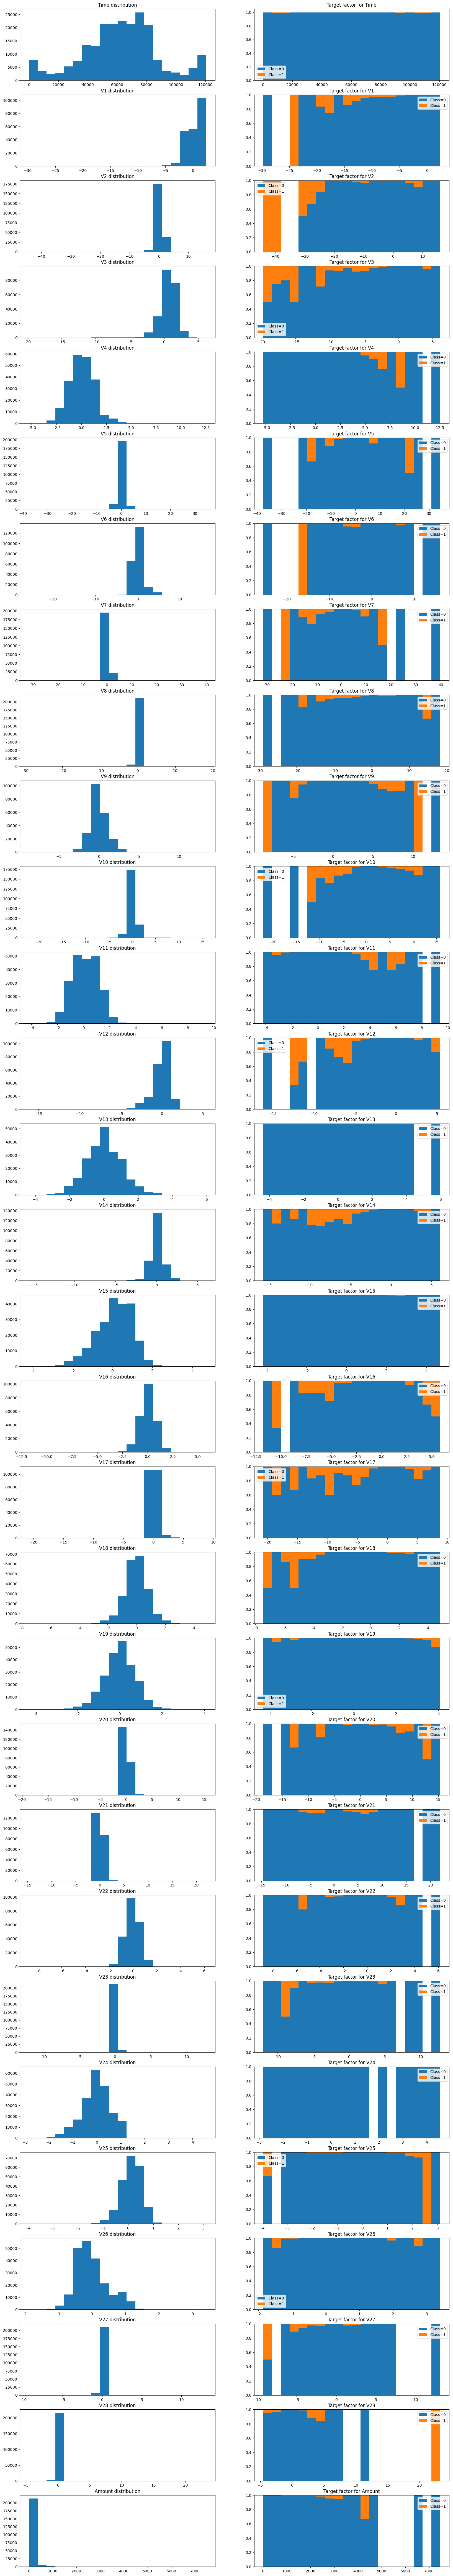

In [7]:
plot_columns_and_target_factors(
    df, target_column_name="Class", excluded_columns={"id"}
)


# PCA

In [16]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(
    df.select(pl.exclude(["id", "Time", "Class"])).to_numpy()
)
df = df.with_columns([
    pl.Series(name='pca_0', values=transformed[:, 0]),
    pl.Series(name='pca_1', values=transformed[:, 1]),
])

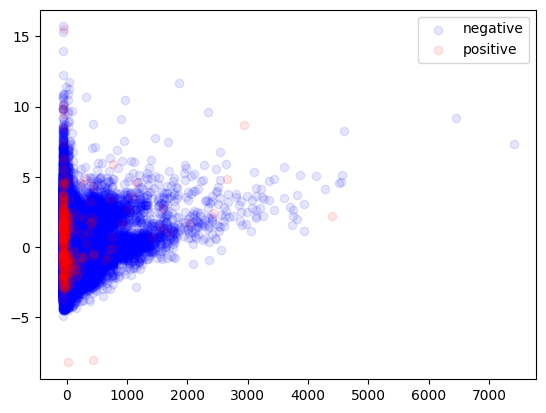

In [19]:
negative_df = df.filter(pl.col("Class") == 0)
positive_df = df.filter(pl.col("Class") == 1)
_ = plt.scatter(negative_df['pca_0'], negative_df["pca_1"], c='b', alpha=0.1, label="negative")
_ = plt.scatter(positive_df['pca_0'], positive_df["pca_1"], c='r', alpha=0.1, label="positive")
_ = plt.legend()

# No export necessary

There were not modifications made to the data.